## Clustering

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the cleaned dataset
df = pd.read_csv("diabetes_cleaned.csv")

# Display the first 5 rows
df.head()

# Drop categorical columns (assuming object types are categorical)
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Display the new dataset
df_numeric.head()

# Normalize the numerical data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

# Display the first 5 rows of the scaled data
df_scaled.head()

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
0,1.709118,0.555017,2.197854,0.634773,0.137716,2.197183,0.151542,0.259896,-0.578659,0.479322,1.758207,0.494018,-0.655702
1,-0.798957,-1.180024,-1.294223,-1.922277,-1.658739,-1.624429,0.359175,-0.778199,-1.079046,-0.857855,-1.182325,-0.949955,-1.703567
2,0.501526,0.146772,-0.130197,0.484358,-0.221575,0.139392,-1.156546,-0.051533,0.422114,0.813616,-1.182325,0.442447,0.735381
3,-1.263416,-1.180024,-1.460513,-0.568545,-0.985068,-0.889503,-0.824333,-0.362961,0.071843,1.565777,0.287941,0.700299,0.623310
4,-0.427391,-1.180024,-1.294223,-0.418130,-1.097347,-0.301563,2.663900,-1.401056,-1.879665,-2.445751,-1.182325,-1.156237,-1.859066


In [22]:
# Apply PCA with 2 components
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(df_scaled)

# Convert to DataFrame
df_pca_2d = pd.DataFrame(pca_2d_result, columns=["PC1", "PC2"])

# Display the first 5 rows
df_pca_2d.head()

,PC1,PC2
0,2.624150,1.643332
1,-4.379489,0.077119
2,0.647788,-1.699469
3,-1.332050,-2.271528
4,-4.061359,3.072115


### K-Means

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
# **Load the Cleaned Dataset**
df = pd.read_csv("diabetes_cleaned.csv")  # Update with correct path if needed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Target                         70000 non-null  object 
 1   Genetic Markers                70000 non-null  object 
 2   Autoantibodies                 70000 non-null  object 
 3   Family History                 70000 non-null  object 
 4   Environmental Factors          70000 non-null  object 
 5   Insulin Levels                 70000 non-null  float64
 6   Age                            70000 non-null  int64  
 7   BMI                            70000 non-null  float64
 8   Physical Activity              70000 non-null  object 
 9   Dietary Habits                 70000 non-null  object 
 10  Blood Pressure                 70000 non-null  int64  
 11  Cholesterol Levels             70000 non-null  int64  
 12  Waist Circumference            70000 non-null 

In [5]:
# **Drop Non-Numeric Columns**
df_numeric = df.select_dtypes(include=['number'])
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Insulin Levels                70000 non-null  float64
 1   Age                           70000 non-null  int64  
 2   BMI                           70000 non-null  float64
 3   Blood Pressure                70000 non-null  int64  
 4   Cholesterol Levels            70000 non-null  int64  
 5   Waist Circumference           70000 non-null  int64  
 6   Blood Glucose Levels          70000 non-null  float64
 7   Weight Gain During Pregnancy  70000 non-null  int64  
 8   Pancreatic Health             70000 non-null  int64  
 9   Pulmonary Function            70000 non-null  int64  
 10  Neurological Assessments      70000 non-null  int64  
 11  Digestive Enzyme Levels       70000 non-null  int64  
 12  Birth Weight                  70000 non-null  int64  
dtypes

In [6]:
# *Standardize the Data**
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)
df_scaled.describe().round(2)

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.54,-1.18,-2.13,-2.57,-2.13,-2.21,-1.68,-1.61,-1.88,-3.37,-1.18,-1.88,-2.24
25%,-0.80,-0.98,-0.80,-0.62,-0.72,-0.74,-0.82,-0.88,-0.78,-0.61,-1.18,-0.80,-0.66
50%,-0.24,-0.11,0.04,0.08,-0.09,-0.15,-0.18,0.05,-0.08,0.15,0.29,0.08,0.01
75%,0.59,0.81,0.70,0.68,0.68,0.58,0.69,0.68,0.82,0.73,0.29,0.75,0.78
max,2.45,2.34,2.36,1.89,2.34,2.79,2.87,2.44,2.57,1.57,1.76,2.71,1.96


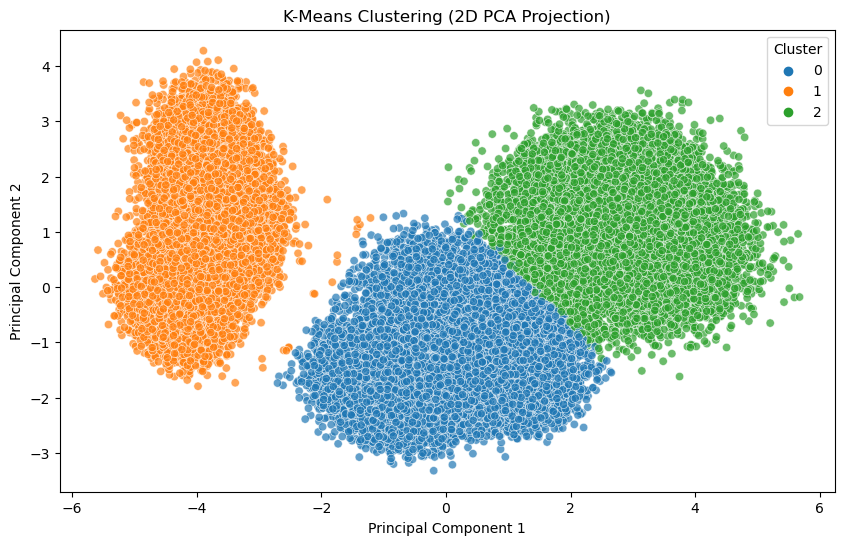

K-Means clustering completed successfully!


In [7]:


# *Apply K-Means Clustering**
k = 3  # Set the number of clusters (change as needed)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# **🔹 Visualize Clusters Using PCA (2D Scatter Plot)**
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = df["Cluster"]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Cluster"], palette="tab10", alpha=0.7)
plt.title("K-Means Clustering (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

print("K-Means clustering completed successfully!")


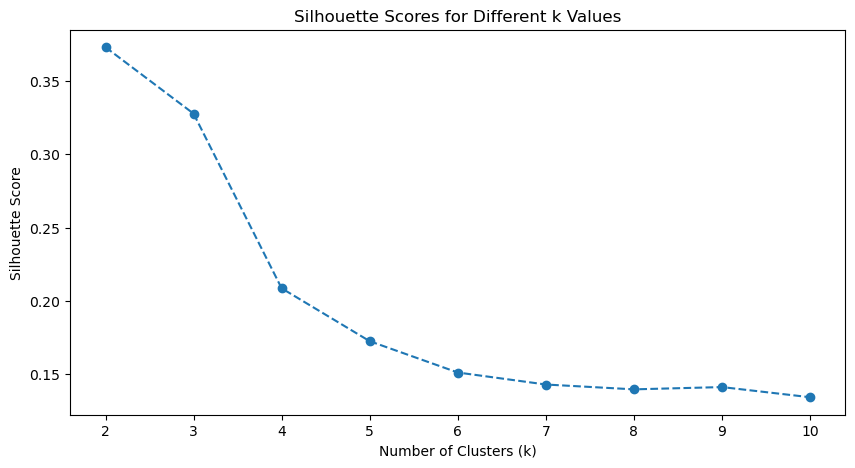

Selected 3 Optimal k Values: [2, 3, 4]


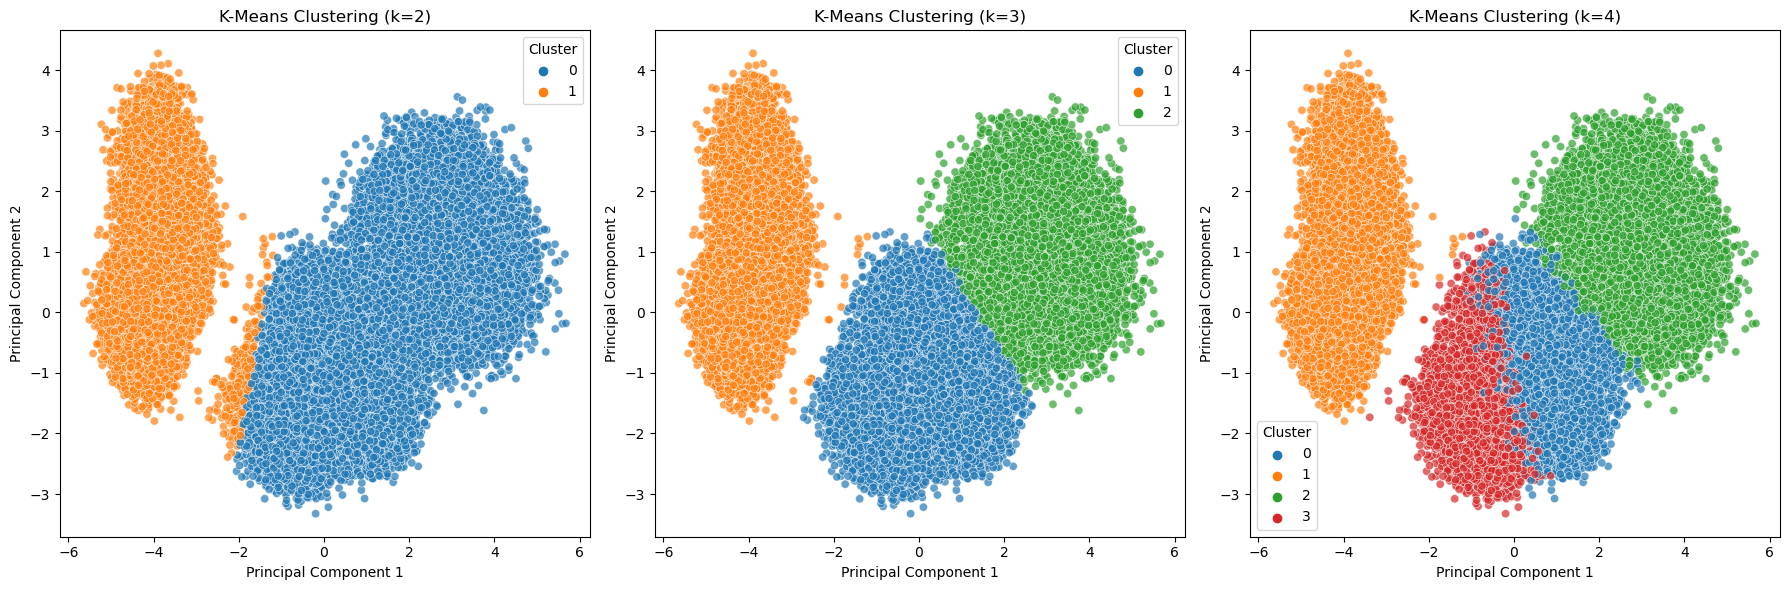

K-Means clustering completed successfully with different k values!


In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **Load the Cleaned Dataset**
df = pd.read_csv("diabetes_cleaned.csv")  # Update path if needed

# **Drop Non-Numeric Columns**
df_numeric = df.select_dtypes(include=['number'])

# *Standardize the Data**
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# **🔹 Find the Best k Using Silhouette Score**
silhouette_scores = []
k_range = range(2, 11)  # Checking k from 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(score)

# **Plot Silhouette Scores**
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different k Values")
plt.show()

# **Select Three Optimal k Values**
optimal_k_values = sorted(zip(k_range, silhouette_scores), key=lambda x: x[1], reverse=True)[:3]
optimal_k_values = [k for k, _ in optimal_k_values]  # Extract k values
print(f"Selected 3 Optimal k Values: {optimal_k_values}")

# **🔹 Perform K-Means Clustering with Selected k Values**
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Creating three subplots for visualization

for i, k in enumerate(optimal_k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df["Cluster"] = kmeans.fit_predict(df_scaled)

    # **Apply PCA for Visualization**
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_scaled)
    df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
    df_pca["Cluster"] = df["Cluster"]

    # **Scatter Plot of Clusters**
    sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Cluster"], palette="tab10", alpha=0.7, ax=axes[i])
    axes[i].set_title(f"K-Means Clustering (k={k})")
    axes[i].set_xlabel("Principal Component 1")
    axes[i].set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

print("K-Means clustering completed successfully with different k values!")


### Hierarchical Clustering

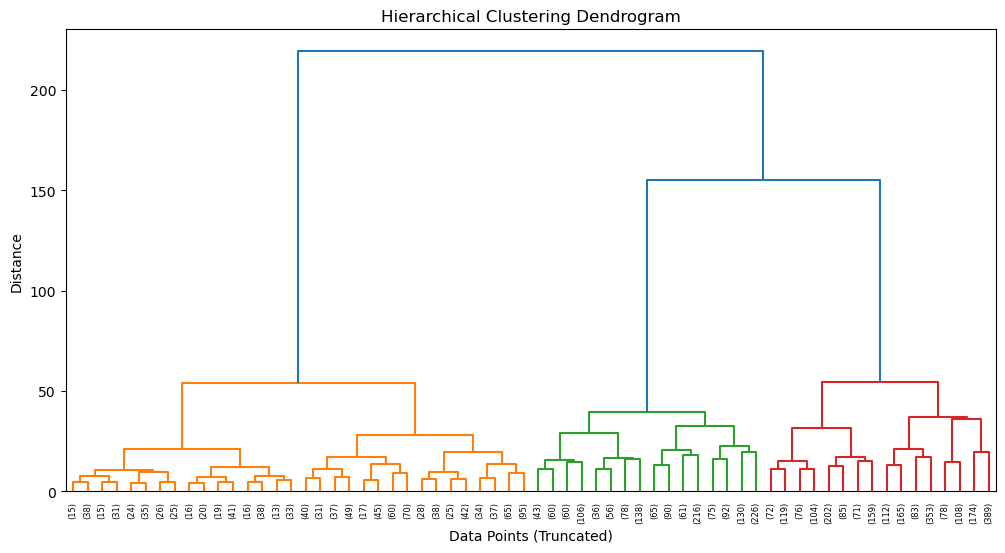

In [8]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# **Load and Scale Dataset**
df = pd.read_csv("diabetes_cleaned.csv")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# **Step 5: Perform Hierarchical Clustering (Limited Sample to Prevent Crashing)**
subset_size = min(5000, len(scaled_data))  # Limit sample size to avoid memory issues
linkage_matrix = linkage(scaled_data[:subset_size], method='ward')  # Compute hierarchical clusters

# **Hierarchical Clustering Dendrogram (Using Limited Sample Size)**
plt.figure(figsize=(12, 6))  # Increase figure size for clarity
dendrogram(linkage_matrix, truncate_mode="level", p=5)  # Only last 5 merging steps shown
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points (Truncated)")
plt.ylabel("Distance")
plt.show()


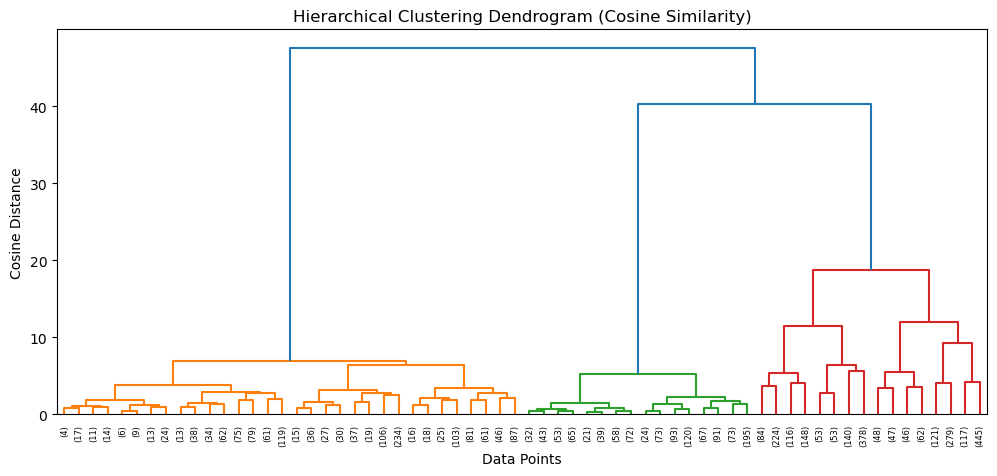

In [24]:
from sklearn.metrics.pairwise import cosine_distances
from scipy.spatial.distance import squareform

# **Load and Scale Dataset**
df = pd.read_csv("diabetes_cleaned.csv")
scaler = StandardScaler()

# **Limit Sample Size to Prevent Memory Error**
sample_size = min(5000, len(df))  # Adjust sample size to 5000 (or lower if needed)
df_sampled = df.sample(n=sample_size, random_state=42)

# **Standardize the Sampled Data**
df_scaled = scaler.fit_transform(df_sampled.select_dtypes(include=[np.number]))

# **Compute Cosine Distance Matrix on Sampled Data**
cosine_dist_matrix = cosine_distances(df_scaled)

# **Convert Distance Matrix to 1D Array for Hierarchical Clustering**
condensed_cosine_dist = squareform(cosine_dist_matrix, checks=False)

# **Perform Hierarchical Clustering using Cosine Similarity**
linkage_matrix = sch.linkage(condensed_cosine_dist, method='ward')

# **Plot Optimized Dendrogram (Limited Sample to Prevent Clutter)**
plt.figure(figsize=(12, 5))
sch.dendrogram(linkage_matrix, truncate_mode="level", p=5)  # Truncate for better readability
plt.title("Hierarchical Clustering Dendrogram (Cosine Similarity)")
plt.xlabel("Data Points")
plt.ylabel("Cosine Distance")
plt.show()



### DBSCAN

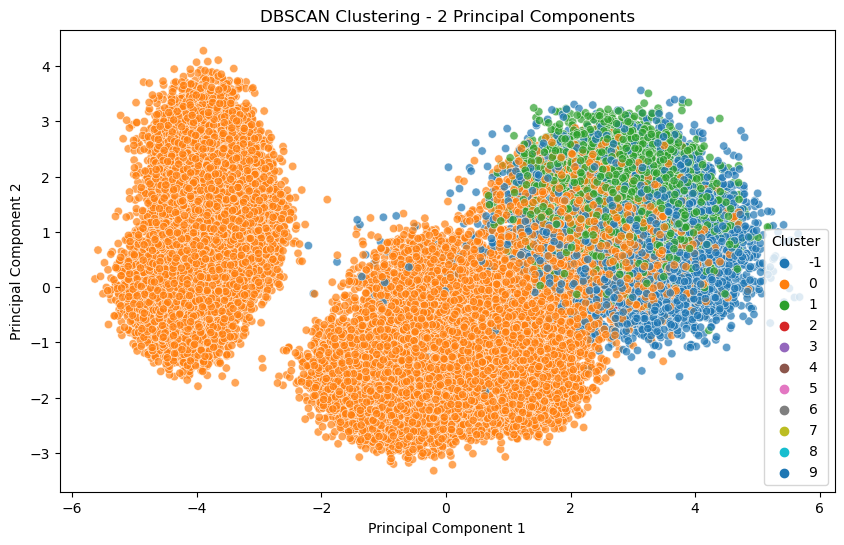

DBSCAN Silhouette Score: 0.0024


In [53]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv("diabetes_cleaned.csv")

# Select numerical columns and scale the data
df_numeric = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=10)  # Adjust eps and min_samples based on trial
df["Cluster_DBSCAN"] = dbscan.fit_predict(df_scaled)

# Apply PCA for visualization (2 components)
pca = PCA(n_components=2)
df_pca_2d = pd.DataFrame(pca.fit_transform(df_scaled), columns=["PC1", "PC2"])
df_pca_2d["Cluster_DBSCAN"] = df["Cluster_DBSCAN"]

# Plot DBSCAN Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca_2d["PC1"], y=df_pca_2d["PC2"], hue=df_pca_2d["Cluster_DBSCAN"], palette="tab10", alpha=0.7)
plt.title("DBSCAN Clustering - 2 Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Compute Silhouette Score (Ignoring noise points labeled as -1)
if len(set(df["Cluster_DBSCAN"])) > 1:  # Ensure at least 2 clusters exist
    dbscan_silhouette = silhouette_score(df_scaled[df["Cluster_DBSCAN"] != -1], df["Cluster_DBSCAN"][df["Cluster_DBSCAN"] != -1])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
else:
    print("DBSCAN did not form enough clusters for silhouette score calculation.")
